# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import networkx as nx

# Datasets

In [2]:
path = '/kaggle/input/coronavirusdataset/'
patient_data_path = path + 'PatientInfo.csv'
route_data_path = path + 'PatientRoute.csv'
time_data_path = path + 'Time.csv'

df_patient = pd.read_csv(patient_data_path)
df_route = pd.read_csv(route_data_path)
df_time = pd.read_csv(time_data_path)

## Patient

**Columns**

1. **patient_id** the ID of the patient
2. **global_num** the number given by KCDC
3. **sex** the sex of the patient
4. **birth_year** the birth year of the patient
5. **age** the age of the patient
6. **country** the country of the patient
7. **province** the province of the patient
8. **city** the city of the patient
9. **disease** TRUE: underlying disease / FALSE: no disease
10. **infection_case** the case of infection
11. **infection_order** the order of infection
12. **infected_by** the ID of who infected the patient
13. **contact_number** the number of contacts with people
14. **symptom_onset_date** the date of symptom onset
15. **confirmed_date** the date of being confirmed
16. **released_date** the date of being released
17. **deceased_date** the date of being deceased
18. **state** isolated / released / deceased

In [3]:
df_patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [4]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 18 columns):
patient_id            2243 non-null int64
global_num            1337 non-null float64
sex                   2147 non-null object
birth_year            1789 non-null float64
age                   1985 non-null object
country               2243 non-null object
province              2243 non-null object
city                  2176 non-null object
disease               19 non-null object
infection_case        1193 non-null object
infection_order       42 non-null float64
infected_by           475 non-null float64
contact_number        413 non-null float64
symptom_onset_date    194 non-null object
confirmed_date        2098 non-null object
released_date         233 non-null object
deceased_date         30 non-null object
state                 2147 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 315.5+ KB


In [5]:
df_patient.isna().sum()

patient_id               0
global_num             906
sex                     96
birth_year             454
age                    258
country                  0
province                 0
city                    67
disease               2224
infection_case        1050
infection_order       2201
infected_by           1768
contact_number        1830
symptom_onset_date    2049
confirmed_date         145
released_date         2010
deceased_date         2213
state                   96
dtype: int64

In [6]:
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
df_patient.released_date = pd.to_datetime(df_patient.released_date)
df_patient.deceased_date = pd.to_datetime(df_patient.deceased_date)

In [7]:
df_patient['time_from_confirmed_to_death'] = df_patient.deceased_date - df_patient.confirmed_date
df_patient['time_from_released_to_death'] = df_patient.released_date - df_patient.confirmed_date
df_patient['age'] = datetime.now().year - df_patient.birth_year 

In [8]:
patient_deceased = df_patient[df_patient.state == 'deceased']
patient_isolated = df_patient[df_patient.state == 'isolated']
patient_released = df_patient[df_patient.state == 'released']

### Sex

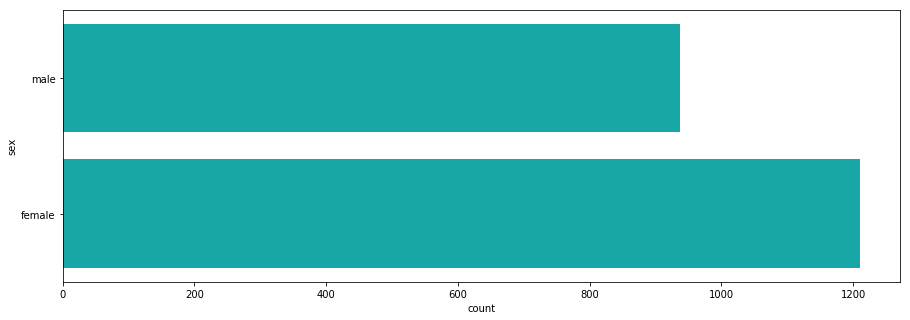

In [9]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="sex", data=df_patient, color="c");

### Age distribution of the deceased by gender

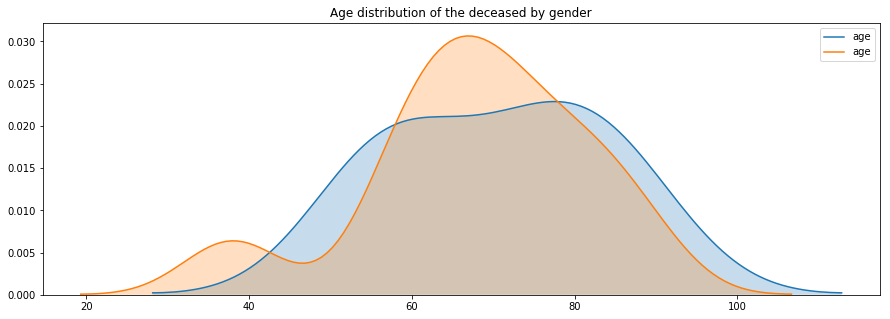

In [10]:
male_dead = patient_deceased[patient_deceased.sex=='male']
female_dead = patient_deceased[patient_deceased.sex=='female']
plt.figure(figsize=(15,5))
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_dead['age'], shade=True);
sns.kdeplot(data=male_dead['age'], shade=True);

### Birth year

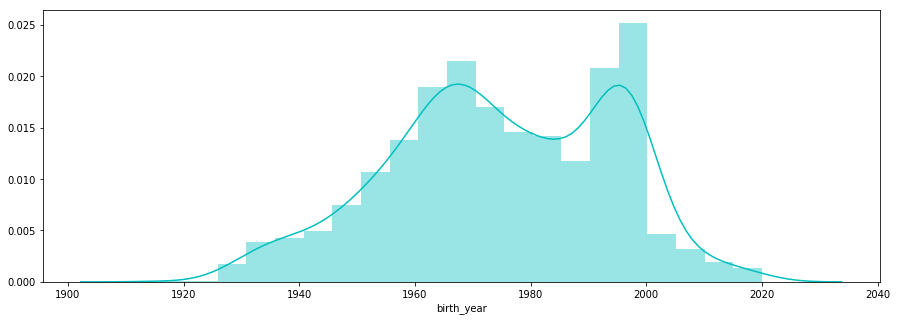

In [11]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df_patient.birth_year, color='c');

### Age

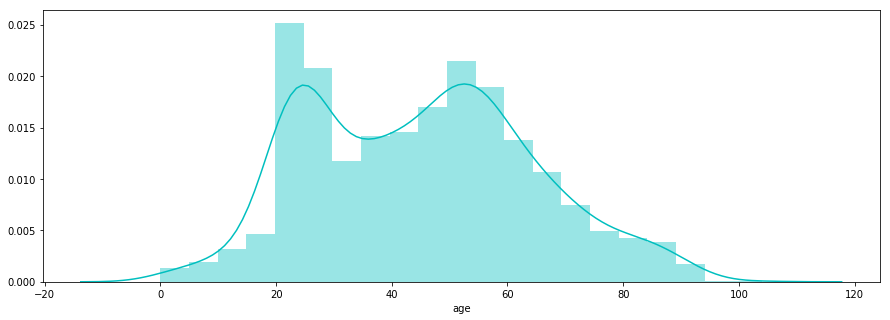

In [12]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df_patient.age, color='c');

### Country

In [13]:
df_patient.country.value_counts()

Korea       2231
China         10
Thailand       1
Mongolia       1
Name: country, dtype: int64

### Infection reason

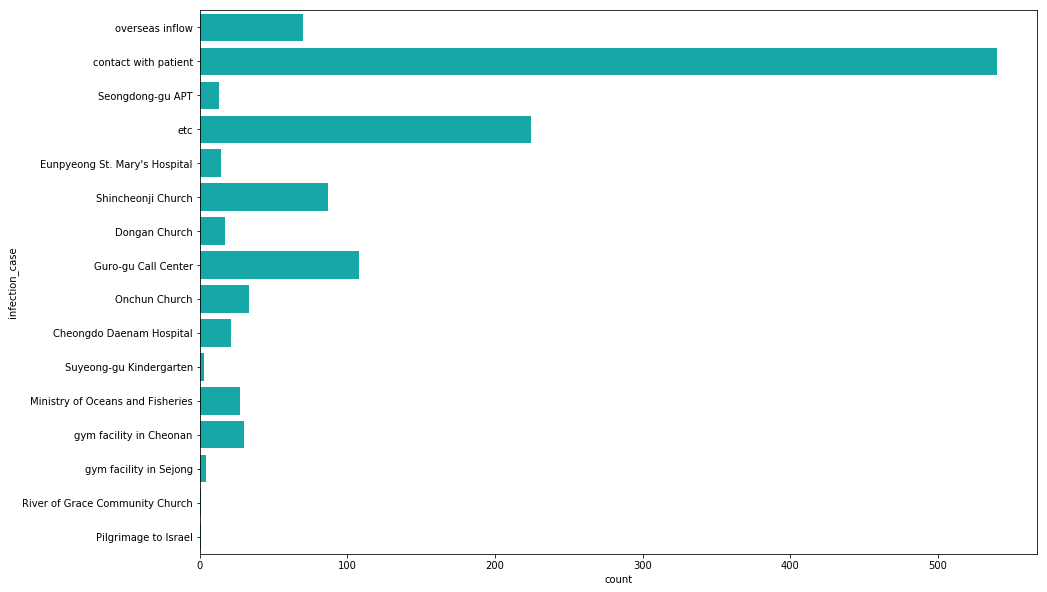

In [14]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="infection_case", data=df_patient, color="c");

### Region

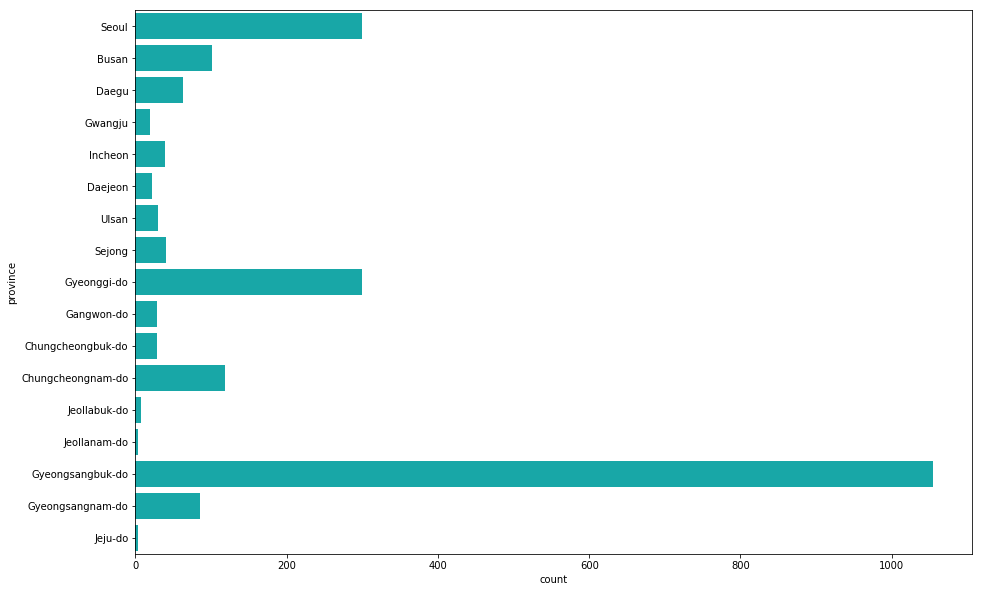

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="province", data=df_patient, color="c");

### State

In [16]:
df_patient.state.value_counts()

isolated    1801
released     314
deceased      32
Name: state, dtype: int64

### State / Age

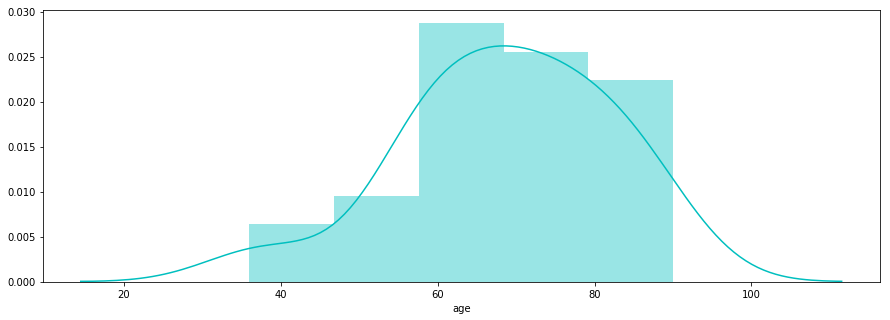

In [17]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(patient_deceased.age, color='c');

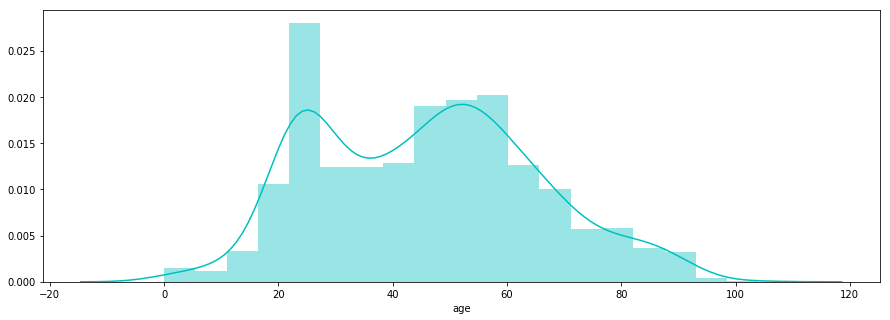

In [18]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(patient_isolated.age, color='c');

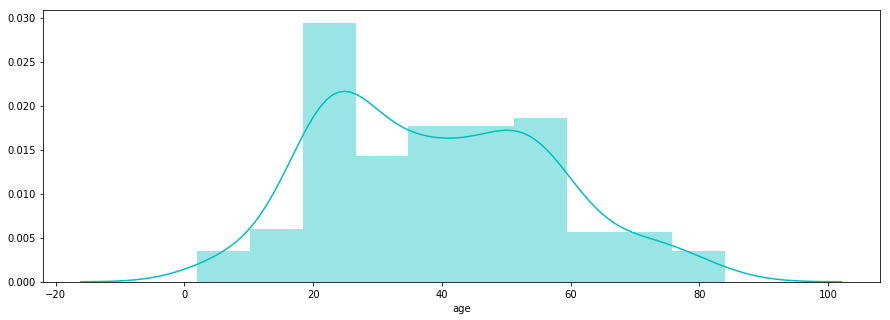

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(patient_released.age, color='c');

### Daily confirmations

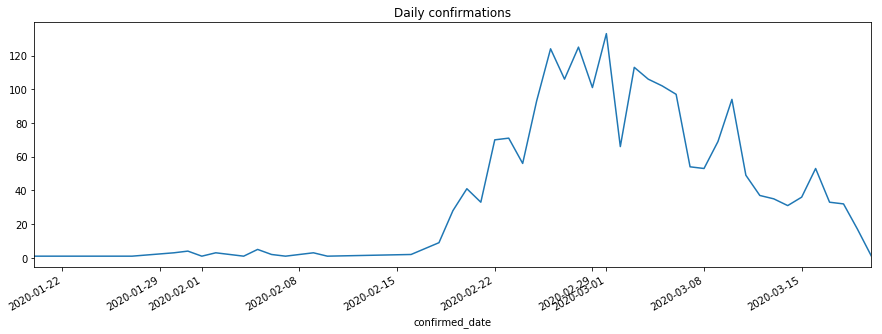

In [20]:
plt.figure(figsize=(15,5))
plt.title('Daily confirmations')
df_patient.groupby('confirmed_date').patient_id.count().plot();

### Confirmed count

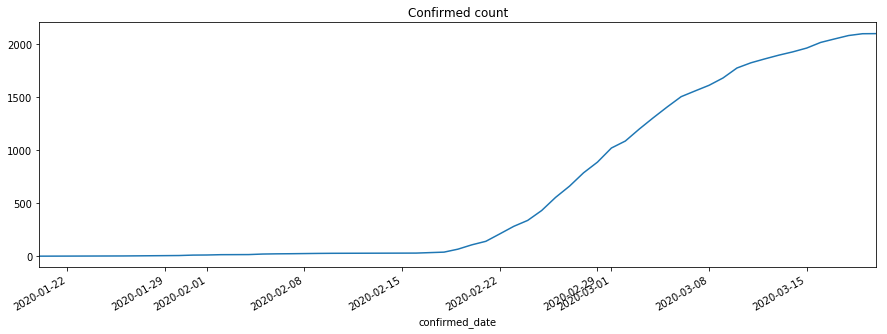

In [21]:
plt.figure(figsize=(15,5))
plt.title('Confirmed count')
df_patient.groupby('confirmed_date').patient_id.count().cumsum().plot();

### Infection networks

In [22]:
data_infected_by = df_patient[df_patient.infected_by.notnull()]

def get_sex_for_patient_id(id):
    result = df_patient[df_patient.patient_id == id].sex.values
    return result[0] if len(result) > 0 else 'none'

def get_country_for_patient_id(id):
    result = df_patient[df_patient.patient_id == id].country.values;
    return result[0] if len(result) > 0 else 'none'

#### Infection network for all samples

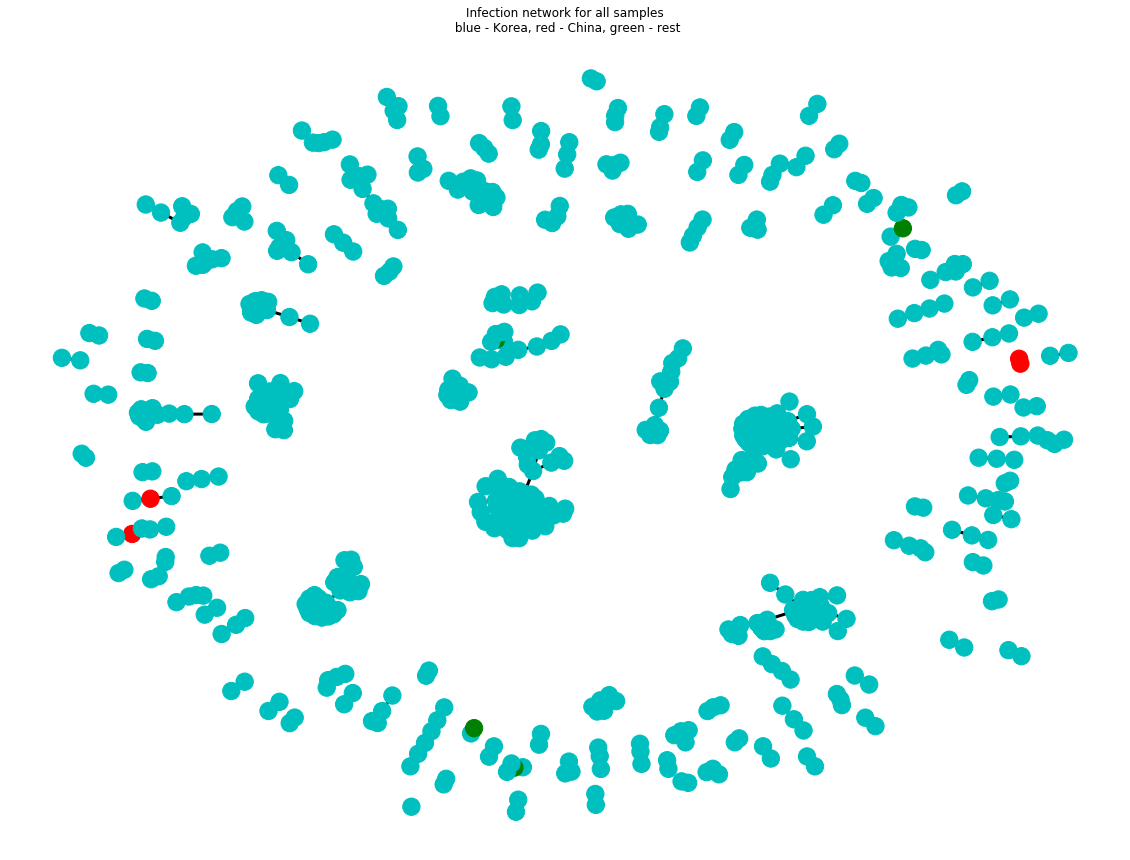

In [23]:
values = data_infected_by[['patient_id', 'infected_by']].values.astype(int)

plt.figure(figsize=(20,15))
plt.title("Infection network for all samples\n blue - Korea, red - China, green - rest")
G1=nx.Graph()
G1.add_edges_from(values)
c_map =  ['c' if get_country_for_patient_id(node) == 'Korea' 
          else 'r' if get_country_for_patient_id(node) == 'China' 
          else 'g'
          for node in G1 ]
# without labels - too long
nx.draw(G1,with_labels=False,node_color=c_map, width=3.0, node_size=300)

#### Infection network in Korea

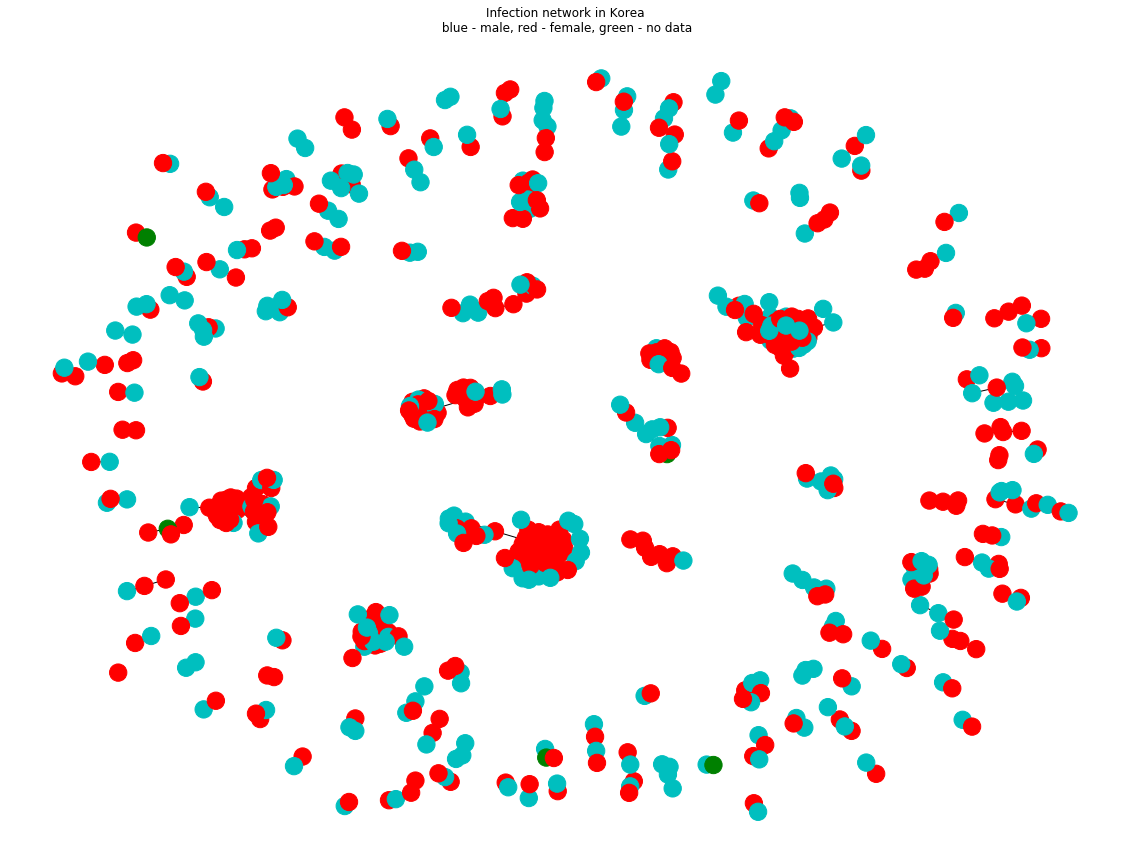

In [24]:
infected_network_korea = data_infected_by[data_infected_by.country == 'Korea']
values = infected_network_korea[['patient_id', 'infected_by']].values.astype(int)

plt.figure(figsize=(20,15))
plt.title("Infection network in Korea\n blue - male, red - female, green - no data")
G1=nx.Graph()
G1.add_edges_from(values)
c_map =  ['c' if get_sex_for_patient_id(node) == 'male' 
          else 'r' if get_sex_for_patient_id(node) == 'female' 
          else 'g'
          for node in G1 ]
# without labels - too long
nx.draw(G1,with_labels=False,node_color=c_map)

# Route

**Columns**


1. **patient_id** the ID of the patient
2. **global_num** the number given by KCDC
3. **date** YYYY-MM-DD
4. **province** Special City / Metropolitan City / Province(-do)
5. **city** City(-si) / Country (-gun) / District (-gu)
6. **latitude** the latitude of the visit (WGS84)
7. **longitude** the longitude of the visit (WGS84)

In [25]:
df_route.head()

,patient_id,global_num,date,province,city,latitude,longitude
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680


In [26]:
df_route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
patient_id    175 non-null int64
global_num    175 non-null int64
date          175 non-null object
province      175 non-null object
city          175 non-null object
latitude      175 non-null float64
longitude     175 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 9.7+ KB


### City

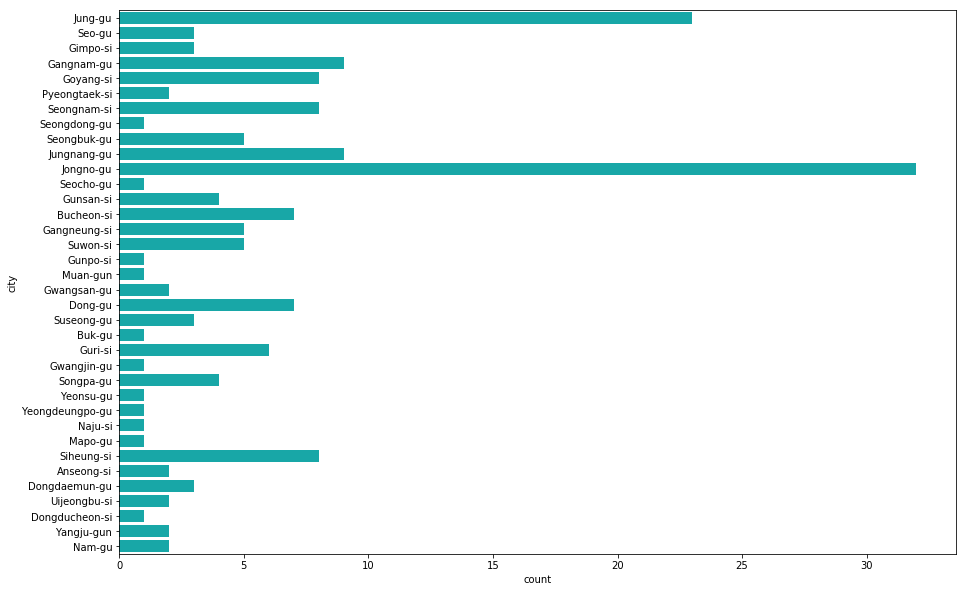

In [27]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="city", data=df_route, color="c");

### Province

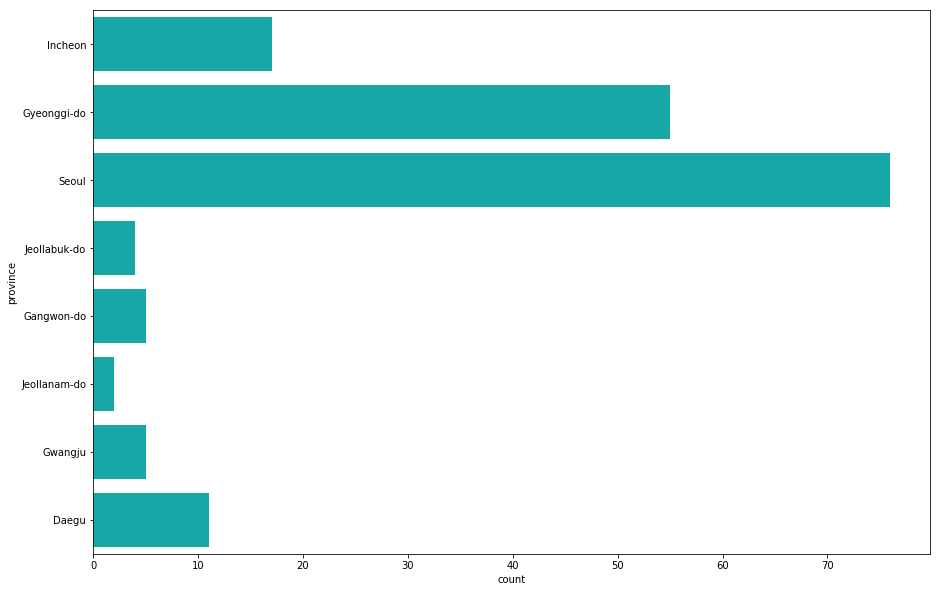

In [28]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="province", data=df_route, color="c");

### Visit

ValueError: Could not interpret input 'visit'

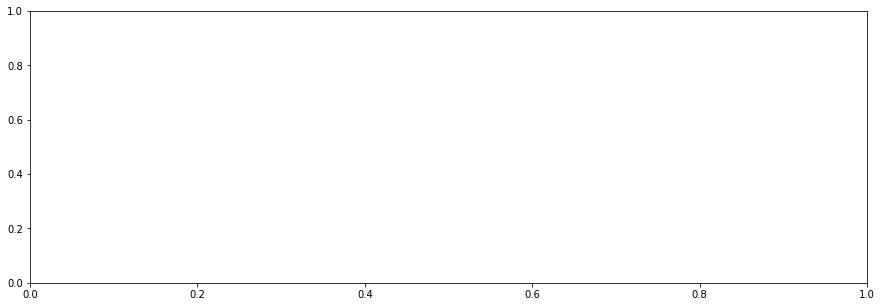

In [29]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="visit", data=df_route, color="c");

### Latitude / Longitude

In [30]:
import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=8,tiles='Stamen Toner')

for lat, lon in zip(df_route['latitude'], df_route['longitude']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(southkorea_map)
southkorea_map

## Time

**Columns**

1. **date** YYYY-MM-DD
2. **time** Time (0 = AM 12:00 / 16 = PM 04:00)
3. **test** the accumulated number of tests
4. **negative** the accumulated number of negative results
5. **confirmed** the accumulated number of positive results
6. **released** the accumulated number of releases
7. **deceased** the accumulated number of deceases

In [31]:
df_time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [32]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
date         63 non-null object
time         63 non-null int64
test         63 non-null int64
negative     63 non-null int64
confirmed    63 non-null int64
released     63 non-null int64
deceased     63 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.6+ KB


In [33]:
df_time.describe()

,time,test,negative,confirmed,released,deceased
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,10.666667,86667.825397,74205.079365,2711.428571,282.031746,22.746032
std,7.603055,111662.737369,101576.799565,3483.978175,653.609160,32.333927
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,660.500000,492.000000,17.000000,0.500000,0.000000
50%,16.000000,13202.000000,11238.000000,104.000000,16.000000,1.000000
75%,16.000000,171464.500000,144213.000000,6525.500000,113.000000,43.000000
max,16.000000,331780.000000,308343.000000,8897.000000,2909.000000,104.000000


# To be continued...